In [93]:
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from wordcloud import WordCloud, STOPWORDS

#nlp = spacy.load('en_core_web_sm')
#nlp = en_core_web_sm.load()

#from nltk import stopwords

In [151]:
df = pd.read_csv("AB_NYC_2019.csv")

#df.rename(columns={'neighbourhood_group': 'n_group'}, inplace=True)

# parsing dates and making a year and month col
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df['year'] = df['last_review'].dt.year.astype("Int64")
df['month'] = df['last_review'].dt.month.astype("Int64")
df['day'] = df['last_review'].dt.day.astype("Int64")

df = df.dropna()

df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
5        Chris           Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  year  \
0               0.21                               6               365  2018   
1               0.38                               2               355  2019   
3               4.64                               1               194  2019   
4               0.10                               1                 0  2018   
5               0.59                               1               129  2019   

   month  day  
0     10   19  
1      5   21  
3      7    5  
4     11   19  
5      6   22

# Word Cloud Neighbourhood groups

In [117]:
stopwords = set(STOPWORDS)
stopwords.add("the")

wc = WordCloud(max_font_size=44, 
               background_color="black",
               stopwords=stopwords)

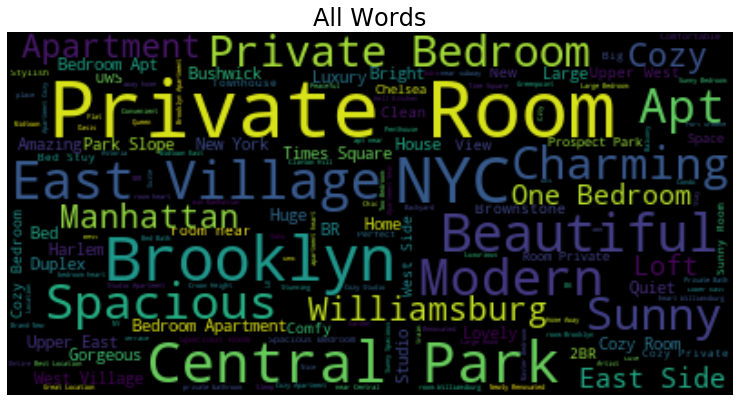

In [119]:
all_text = ", ".join(df.name.dropna().to_list())
all_text[:100]

fig, ax = plt.subplots(figsize=(13,8))
ax.set_title(f"All Words", fontsize=24)
wordcloud = wc.generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
cols = ["neighbourhood_group", "name"]
txt = df[cols].dropna().groupby("neighbourhood_group")["name"].apply(lambda x: "{%s}" % ', '.join(x))

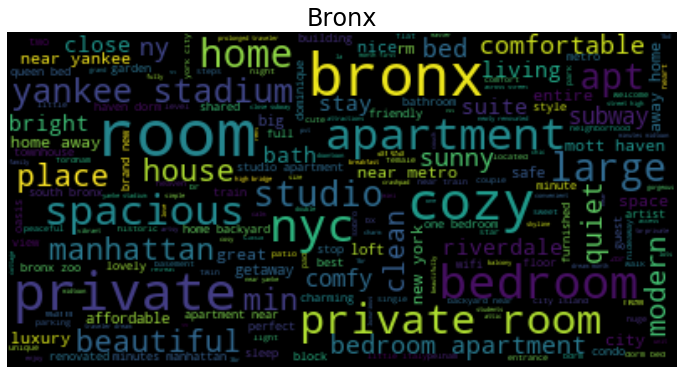

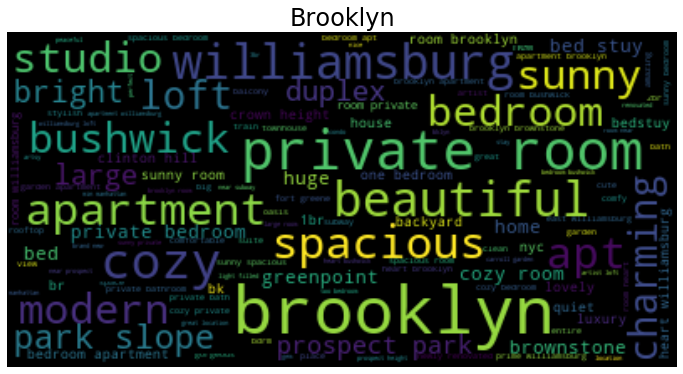

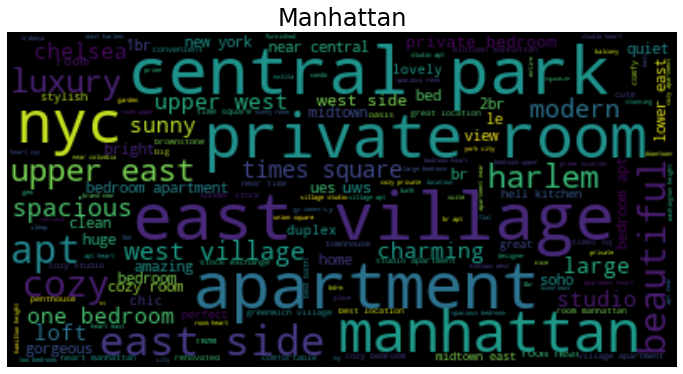

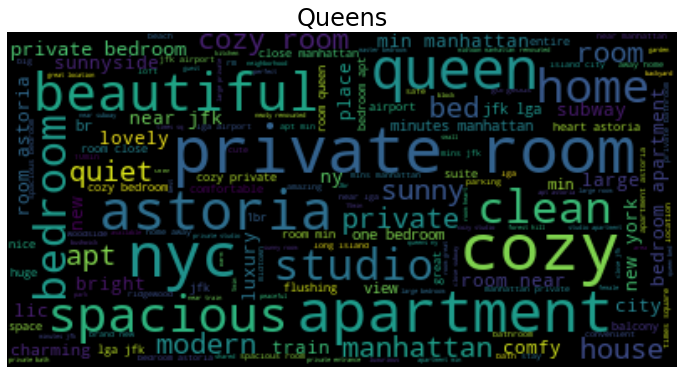

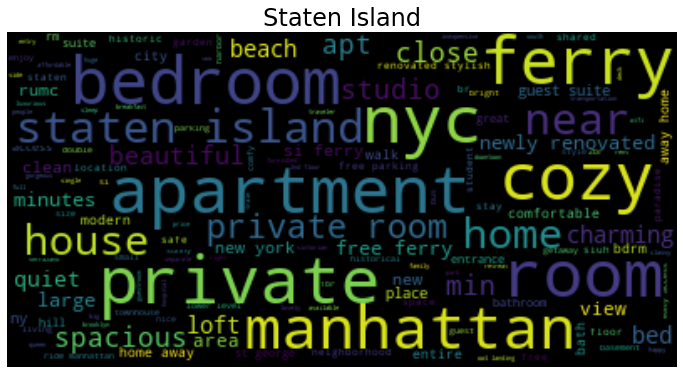

In [107]:
n_hoods = sorted(df.neighbourhood_group.unique())

for nhood in n_hoods:
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_title(f"{nhood}", fontsize=24)
    
    text = txt[nhood].lower()
    
    wordcloud = wc.generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

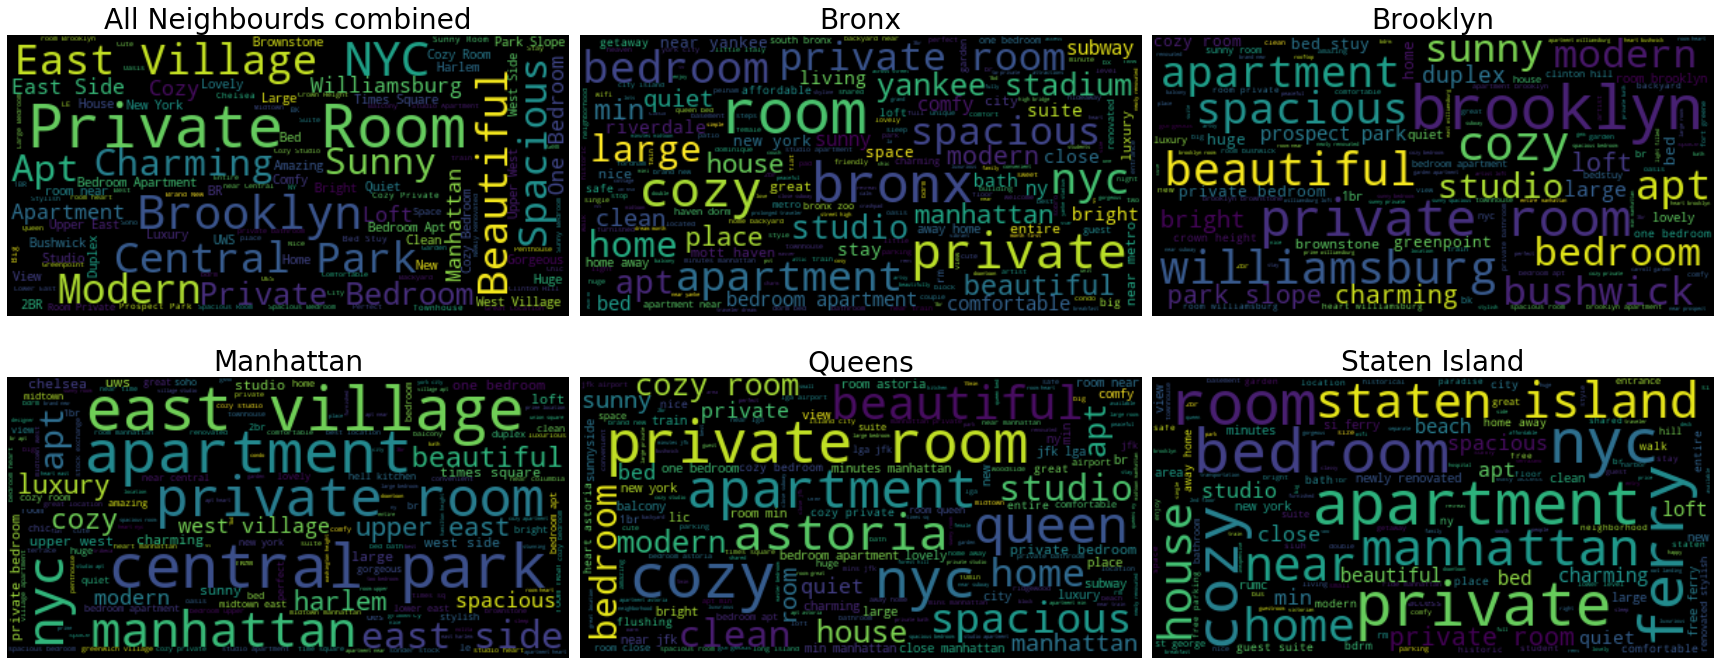

In [139]:
n_hoods = sorted(df.neighbourhood_group.unique())

fig, axes = plt.subplots(2,3, figsize=(24,10), sharex=True, sharey=True)

ax = axes.flat[0]
ax.axis("off")
ax.set_title(f"All Neighbourds combined", fontsize=28)
wordcloud = wc.generate(all_text)
ax.imshow(wordcloud, interpolation='bilinear')


for nhood, ax in zip(n_hoods, axes.flat[1:]):
    
    ax.set_title(f"{nhood}", fontsize=28)
    
    text = txt[nhood].lower()
    
    wordcloud = wc.generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")

plt.tight_layout()

# Wordcloud price

In [193]:
df2 = df.query("price < 1500").dropna()
print(df2.shape)

df2["type"] = pd.cut(df2.price, [0, 200, 400, 1000], labels=["cheap", "medium", "expensive"])
df2.head(1)

(38674, 20)


id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  year  month  day   type  
0                               6               365  2018     10   19  cheap

In [194]:
txt = df2.groupby("type")["name"].apply(lambda x: "{%s}" % ', '.join(x))
txt

type
cheap        {Clean & quiet apt home by the park, Cozy Enti...
medium       {Skylit Midtown Castle, Perfect for Your Paren...
expensive    {perfect for a family or small group, 2000 SF ...
Name: name, dtype: object

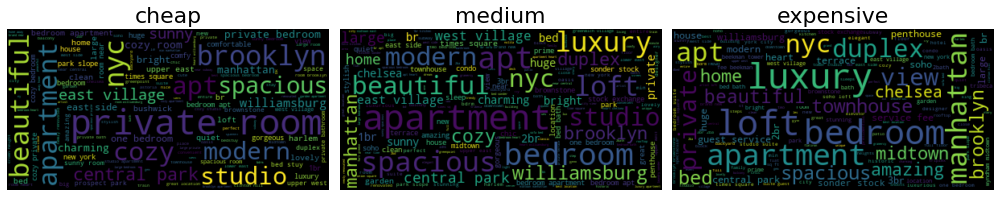

In [195]:
fig, axes = plt.subplots(1,3, figsize=(14,12), sharex=True, sharey=True)

for c, ax in zip(["cheap", "medium", "expensive"], axes.flat):
    
    ax.set_title(f"{c}", fontsize=22)
    
    text = txt[c].lower()
    
    wordcloud = wc.generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    
plt.tight_layout()

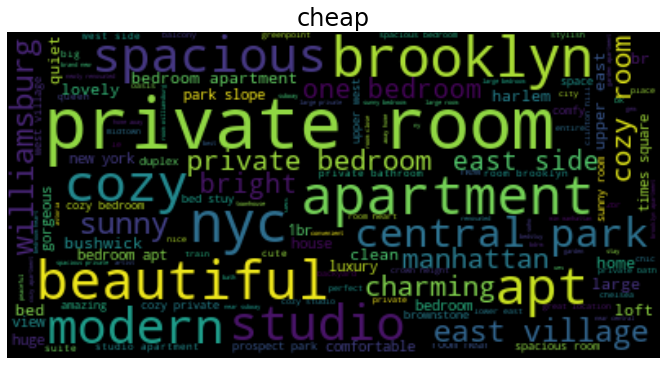

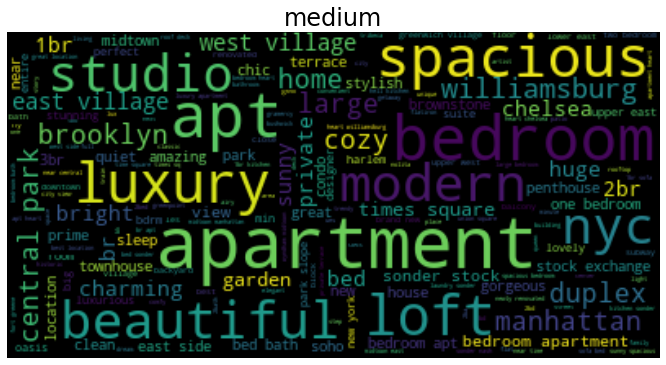

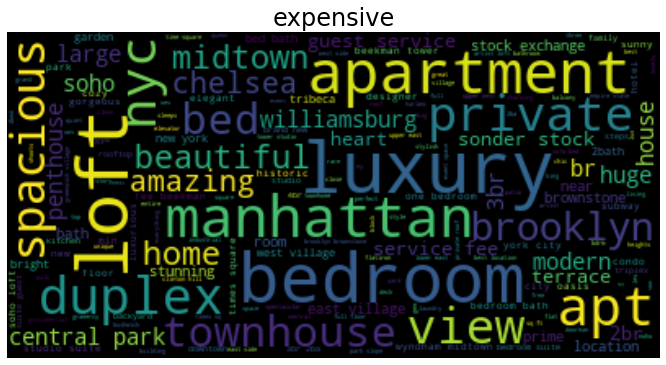

In [182]:
for c, ax in zip(["cheap", "medium", "expensive"], axes.flat):
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(f"{c}", fontsize=24)
    
    text = txt[c].lower()
    
    wordcloud = wc.generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()